## PART 4: Main Func: with Modifier.py
Error: the NaN values for X show up when Modifier can't generate (given the interval) new values.

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [(1, 100)]

Simulator...
Validator...
       *** USING local_exploration_validator_A


CALLED FIT_CURVE3
Y_PRED[ -8.27089732  -9.48521147 -12.25302263 -15.41867094 -17.5015213
 -17.26355219 -14.49524789 -11.01979405 -11.9155767  -26.95698465]
X_VALUES[  1.           2.43478261   6.26086957  12.47826087  21.08695652
  32.08695652  45.47826087  61.26086957  79.43478261 100.        ]
EQUATIONy = -0.00017738357885444897x^3  0.025087654914562618x^2 + -0.9308499732805681x^1  -7.364957614387425
LEAST FIT POINTS:  [[1.0, -1.2322952893017347], [6.260869565217392, -18.0938528494176], [12.478260869565217, -21.99482552795434], [21.08695652173913, -12.23126649441853], [32.086956521739125, -10.986329749840095], [45.47826086956522, -21.710871711784343]]
unfit_interval [[1.0, 2.0760869565217392], [3.391304347826087, 57.315217391304344]]
least_fit_points [[1.0, -1.2322952893017347], [6.260869565217392, -18.0938528494176], [12.4782608

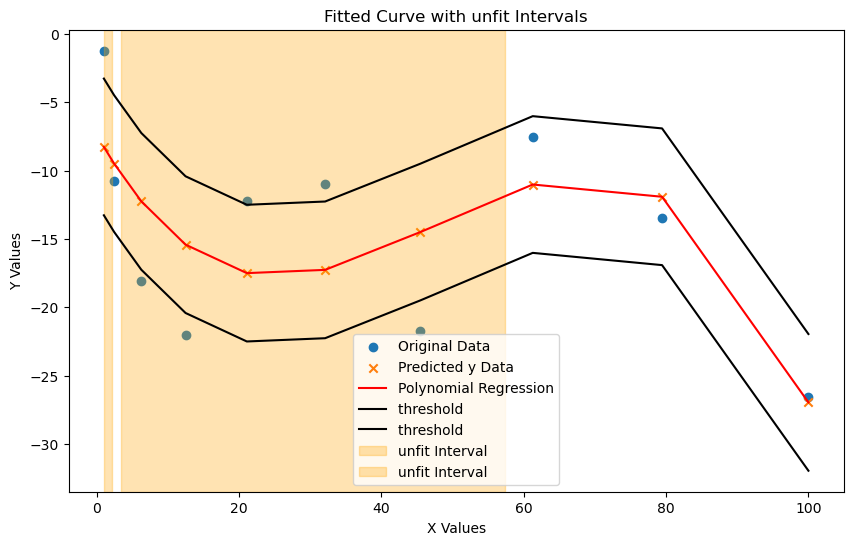

       *** OUTPUT unfit_interval [[1.0, 2.0760869565217392], [3.391304347826087, 57.315217391304344]] 

equation,fit_points,fit_interval
 y = -0.00017738357885444897x^3  0.025087654914562618x^2 + -0.9308499732805681x^1  -7.364957614387425 
 [[2.4347826086956523, -10.759183746113855], [61.26086956521739, -7.576123446592084], [79.43478260869566, -13.454532370724865], [100.0, -26.541197942939]] 

 [[1, 1.0], [2.0760869565217392, 3.391304347826087], [57.315217391304344, 100]]
       *** OUTPUT validator_intervals [[1.0, 2.0760869565217392], [3.391304347826087, 57.315217391304344]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[1.0, 2.0760869565217392], [3.391304347826087, 57.315217391304344]]

Simulator...
Validator...
THIS IS POINTS  [[1.0, -6.725336289359517], [1.0, -1.2322952893017347], [3.391304347826087, -1.4152161265089946], [5.294642554571729, -20.43380626524779], [6.260869565217392, -18.0938528494176], [9.131340075424934, -17.28577473122673], [12.47826086

/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree

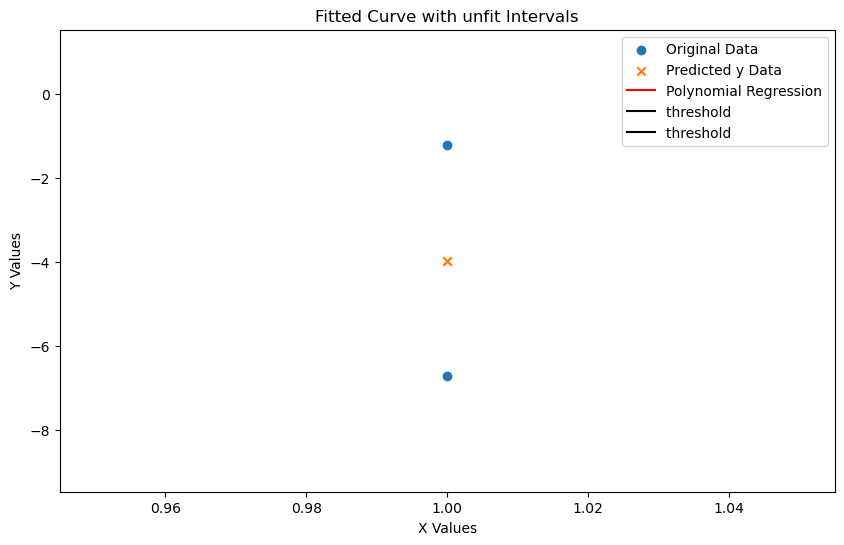

       *** OUTPUT unfit_interval [] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y = -0.3978815789330628x^9  -0.3978815789330627x^8  -0.3978815789330627x^7  -0.3978815789330627x^6  -0.3978815789330627x^5  -0.3978815789330627x^4  -0.3978815789330627x^3  -0.3978815789330627x^2  -0.3978815789330627x^1  -0.3978815789330627 
 [[1.0, -6.725336289359517], [1.0, -1.2322952893017347]] 
 [[1.0, 2.0760869565217392]]


THIS IS self.least_fit_x_interval  [[1.0, 2.0760869565217392], [3.391304347826087, 57.315217391304344]]
THIS IS EACH INTERVAL  3.391304347826087   57.315217391304344
       *** USING local_exploration_validator_A


CALLED FIT_CURVE3
Y_PRED[-15.14556641 -14.77765759 -14.66064568 -14.55567401 -14.81034414
 -15.18227701 -16.49929448 -16.83870063 -18.12749198 -18.12757697
 -14.66153641 -13.43675801   2.70241714]
X_VALUES[ 3.39130435  5.29464255  6.26086957  9.13134008 12.47826087 14.90139691
 21.08695652 22.60481306 32.08695652 32.24158852 43.8117233  45.478

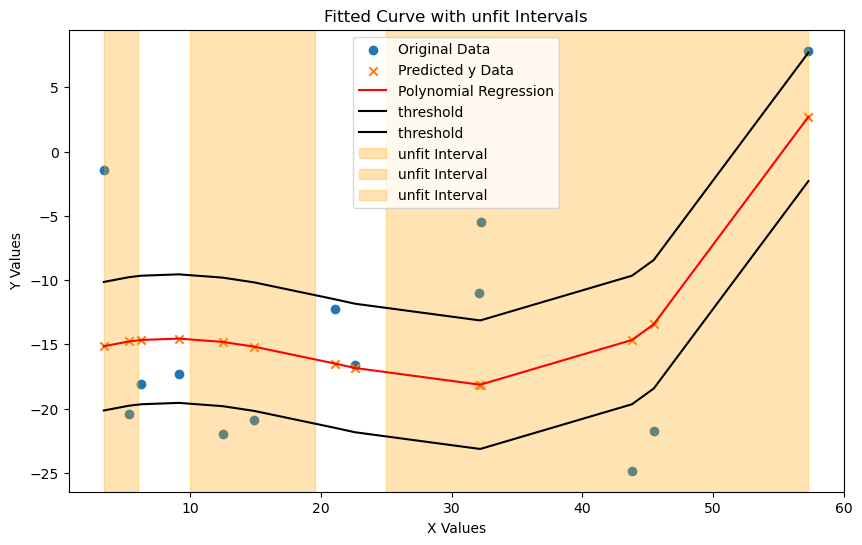

       *** OUTPUT unfit_interval [[3.391304347826087, 6.019312812555976], [9.968070273960004, 19.54056661890077], [24.97534892502529, 57.315217391304344]] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y = 0.0005446268040530205x^3 + -0.033299204906421145x^2  0.4512211791297958x^1 + -16.31406462086168 
 [[6.260869565217392, -18.0938528494176], [9.131340075424934, -17.28577473122673], [21.08695652173913, -12.23126649441853], [22.604813059454013, -16.588134126200888]] 
 [[3.391304347826087, 3.391304347826087], [6.019312812555976, 9.968070273960004], [19.54056661890077, 24.97534892502529]]
       *** OUTPUT validator_intervals [[3.391304347826087, 6.019312812555976], [9.968070273960004, 19.54056661890077], [24.97534892502529, 57.315217391304344]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[3.391304347826087, 6.019312812555976], [9.968070273960004, 19.54056661890077], [24.97534892502529, 57.315217391304344]]

Simulator...
Validator...

/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/Users/cycnos/help_davide/SimEx/notebooks/Validator.py:68: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


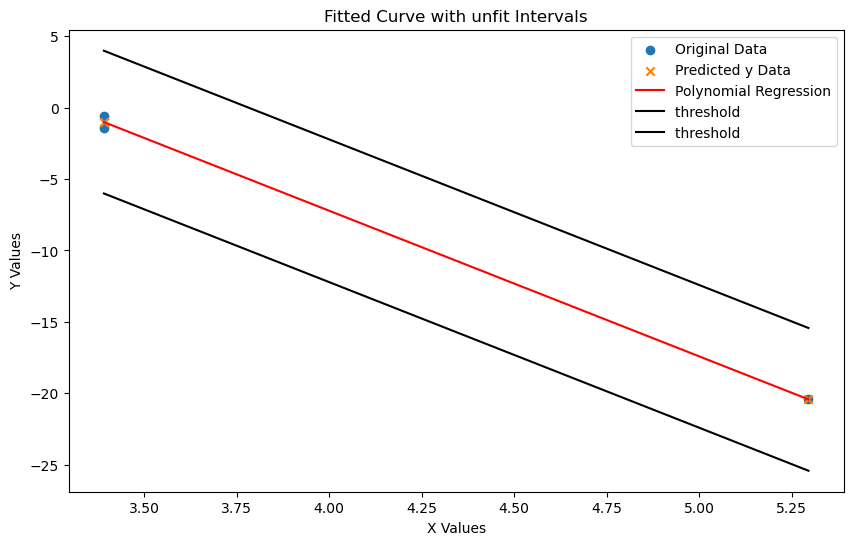

       *** OUTPUT unfit_interval [] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y = -0.1279399430541472x^3  -0.34072068464870797x^2  0.10820004671523327x^1 + 7.534429791220843 
 [[3.391304347826087, -0.5994012981884327], [3.391304347826087, -1.4152161265089946], [5.294642554571729, -20.43380626524779]] 
 [[3.391304347826087, 6.019312812555976]]


THIS IS self.least_fit_x_interval  [[3.391304347826087, 6.019312812555976], [9.968070273960004, 19.54056661890077], [24.97534892502529, 57.315217391304344]]
THIS IS EACH INTERVAL  9.968070273960004   19.54056661890077
       *** USING local_exploration_validator_A


CALLED FIT_CURVE3
Y_PRED[-20.65272427 -16.87711147 -14.48444987 -13.23243863  -6.25459854]
X_VALUES[ 9.96807027 12.47826087 14.06900572 14.90139691 19.54056662]
EQUATIONy = 1.5041139962402215x^1 + -35.645838287947406
LEAST FIT POINTS:  [[9.968070273960004, -15.55006844284537], [12.478260869565217, -21.99482552795434], [14.901396910385692, -20.884094282

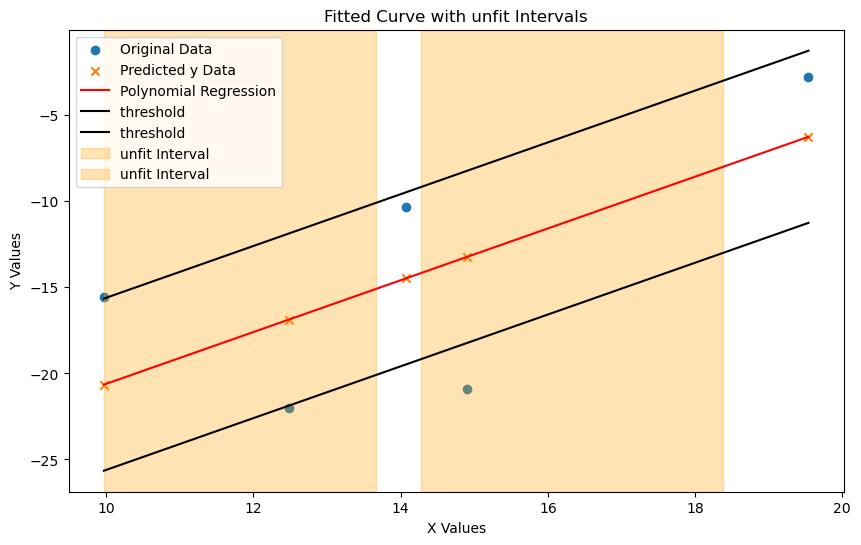

       *** OUTPUT unfit_interval [[9.968070273960004, 13.67131950618201], [14.277103516387129, 18.380774191771998]] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y = 1.5041139962402215x^1 + -35.645838287947406 
 [[14.069005718387608, -10.318356012811766], [19.54056661890077, -2.753978519729083]] 
 [[9.968070273960004, 9.968070273960004], [13.67131950618201, 14.277103516387129], [18.380774191771998, 19.54056661890077]]


THIS IS self.least_fit_x_interval  [[3.391304347826087, 6.019312812555976], [9.968070273960004, 19.54056661890077], [24.97534892502529, 57.315217391304344]]
THIS IS EACH INTERVAL  24.97534892502529   57.315217391304344
       *** USING local_exploration_validator_A


CALLED FIT_CURVE3
Y_PRED[ -1.07359716  -6.80829113 -12.13620129 -14.12077726 -14.32362221
 -16.53668737 -19.42187621 -20.13666184 -19.74006063 -18.93295472
 -17.95870541 -12.09843523  -1.69904673  -1.69904673]
X_VALUES[24.97534893 27.63664181 30.6925606  32.08695652 32.24158852 3

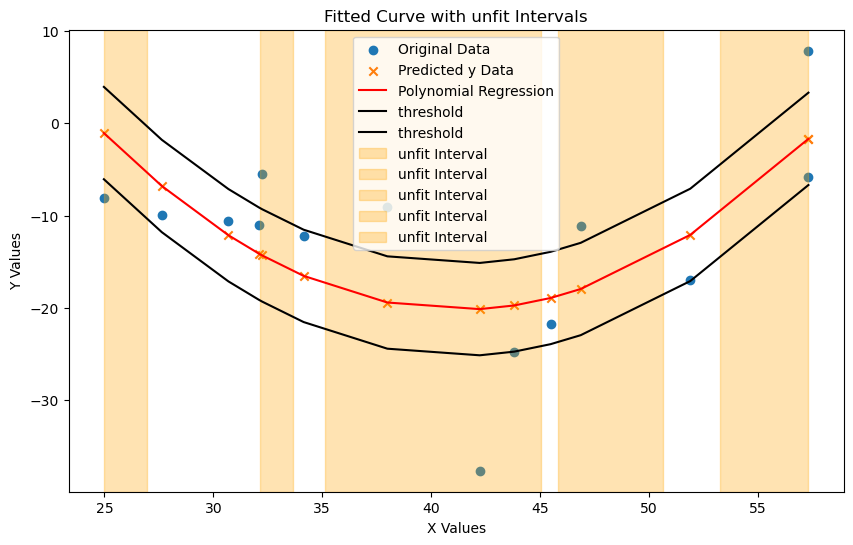

       *** OUTPUT unfit_interval [[24.97534892502529, 26.971318587930583], [32.12561452196182, 33.6677261038352], [35.104397948769694, 45.061626477152245], [45.824319360395634, 50.634281077177945], [53.24746171678231, 57.315217391304344]] 

equation,least_fit_points,local_unfit_interval,fit_points,fit_interval
 y = 0.07195469111032486x^2 + -5.940532172824839x^1  102.41022901211426 
 [[27.63664180889901, -9.891316885723267], [30.692560599747345, -10.627109848764086], [32.086956521739125, -10.986329749840095], [34.1431052975703, -12.189542314210321], [45.47826086956522, -21.710871711784343], [51.8915431586083, -17.020641188475807], [57.315217391304344, -5.786865684253835]] 
 [[24.97534892502529, 24.97534892502529], [26.971318587930583, 32.12561452196182], [33.6677261038352, 35.104397948769694], [45.061626477152245, 45.824319360395634], [50.634281077177945, 53.24746171678231]]
       *** OUTPUT validator_intervals [[9.968070273960004, 13.67131950618201], [14.277103516387129, 18.3807741917

In [1]:
# IMPORT LIBRARIES
import numpy as np

# import global parameters 
# TODO: make interface (widget) to load/change the parameters (low-priority)
from global_settings import mdv,simexSettings

#import classes for Modifier, Simulator, and Validator,
from Validator import Validator
from Modifier import Modifier
from Simulator import Simulator
from Logger import Logger

validator = Validator()
modifier = Modifier
simulator = Simulator
logger = Logger()

logger_main_arguments = {
    'log_contex': 'overall MAIN stats',
    'main_status': 'begin cycle'
}

logger.log_main(logger_main_arguments)

is_main_func = True
# Initialize interval list
intervals_list=[(mdv['domain_min_interval'], mdv['domain_max_interval'])]





while is_main_func:
    
    # Calls Modifier Controller
    mod_x_list= modifier.modifier_controller(intervals_list=intervals_list,local_modifier=modifier.local_modifier_A, do_plot=simexSettings['do_plot'])

    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ['modifier_data_point'] < mdv['modifier_incremental_unit']:
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no generated points'
        logger.log_main(logger_main_arguments)
        break
    
    # Calls Simulator
    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_B)
    assert len(mod_x) == len(sim_y_list)
    
    
    # print('\n\n Modx: ',mod_x,'\nsymx: ',sim_y_list)
    
    # Calls Validator controller
    intervals_list = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    # Updates interval_list to new range output from validator controller

    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)


# TODO: make a list of history variable that are needed in validator: i-e- number of points total, number of good points, etc. 